In [13]:
from DeNN.model import resnet
from DeNN.dataset_loader import data_loader, data_augmentation
from DeNN.trainer import trainer
from DeNN.visualization import * 

In [2]:
import torch,torchvision
from torchsummary import summary
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision.transforms.functional import normalize, resize, to_tensor, to_pil_image

In [3]:
DATA_PATH = 'D:/Github/Dataset/'
BATCH_SIZE =128

In [4]:
my_transformations = data_augmentation.DataAugmentationCifar10_album()
train, test = data_loader.DatasetCifar10(data_path = DATA_PATH,transformations = my_transformations,batch_size = BATCH_SIZE).load_data()

Files already downloaded and verified
Files already downloaded and verified


In [5]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [6]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = resnet.ResNet18().to(device)

In [7]:
summary(model,input_size=(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

In [8]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
trainer = trainer.Trainer( model =model , optimizer =optimizer , device =device , train_loader = train, test_loader = test,epochs = 5,criteria = criterion)

In [9]:
(w,x),(y,z) = trainer.train()

loss=2.3867440223693848 batch_id=0 Accuracy = 0.00016:   0%|                           | 1/391 [00:00<00:56,  6.92it/s]

Epoch: 1


loss=1.2938568592071533 batch_id=390 Accuracy = 0.40758: 100%|███████████████████████| 391/391 [00:37<00:00, 10.50it/s]
loss=1.402056336402893 batch_id=0 Accuracy = 0.00136:   0%|                                    | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0106, Accuracy: 5125/10000 (51.25%)

Epoch: 2


loss=1.1306238174438477 batch_id=390 Accuracy = 0.56462: 100%|███████████████████████| 391/391 [00:37<00:00, 10.52it/s]
loss=1.1487566232681274 batch_id=0 Accuracy = 0.00152:   0%|                           | 1/391 [00:00<00:39,  9.83it/s]


Test set: Average loss: 0.0086, Accuracy: 5991/10000 (59.91%)

Epoch: 3


loss=0.8851416707038879 batch_id=390 Accuracy = 0.63492: 100%|███████████████████████| 391/391 [00:37<00:00, 10.48it/s]
loss=0.833789050579071 batch_id=0 Accuracy = 0.0018:   0%|                             | 1/391 [00:00<00:39,  9.93it/s]


Test set: Average loss: 0.0074, Accuracy: 6684/10000 (66.84%)

Epoch: 4


loss=0.9600955843925476 batch_id=390 Accuracy = 0.68672: 100%|███████████████████████| 391/391 [00:36<00:00, 10.64it/s]
loss=0.7606819868087769 batch_id=1 Accuracy = 0.00376:   0%|                                   | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0063, Accuracy: 7194/10000 (71.94%)

Epoch: 5


loss=0.6897202730178833 batch_id=390 Accuracy = 0.72284: 100%|███████████████████████| 391/391 [00:36<00:00, 10.61it/s]



Test set: Average loss: 0.0060, Accuracy: 7404/10000 (74.04%)



In [10]:
data, target = next(iter(test))
data, target = data.to(device), target
data = data[:11]
target = target[:11].tolist()

In [11]:
mns_obj = data_augmentation.Dataset_Mean_and_std()
mean,std = mns_obj.mean_and_std('cifar10')

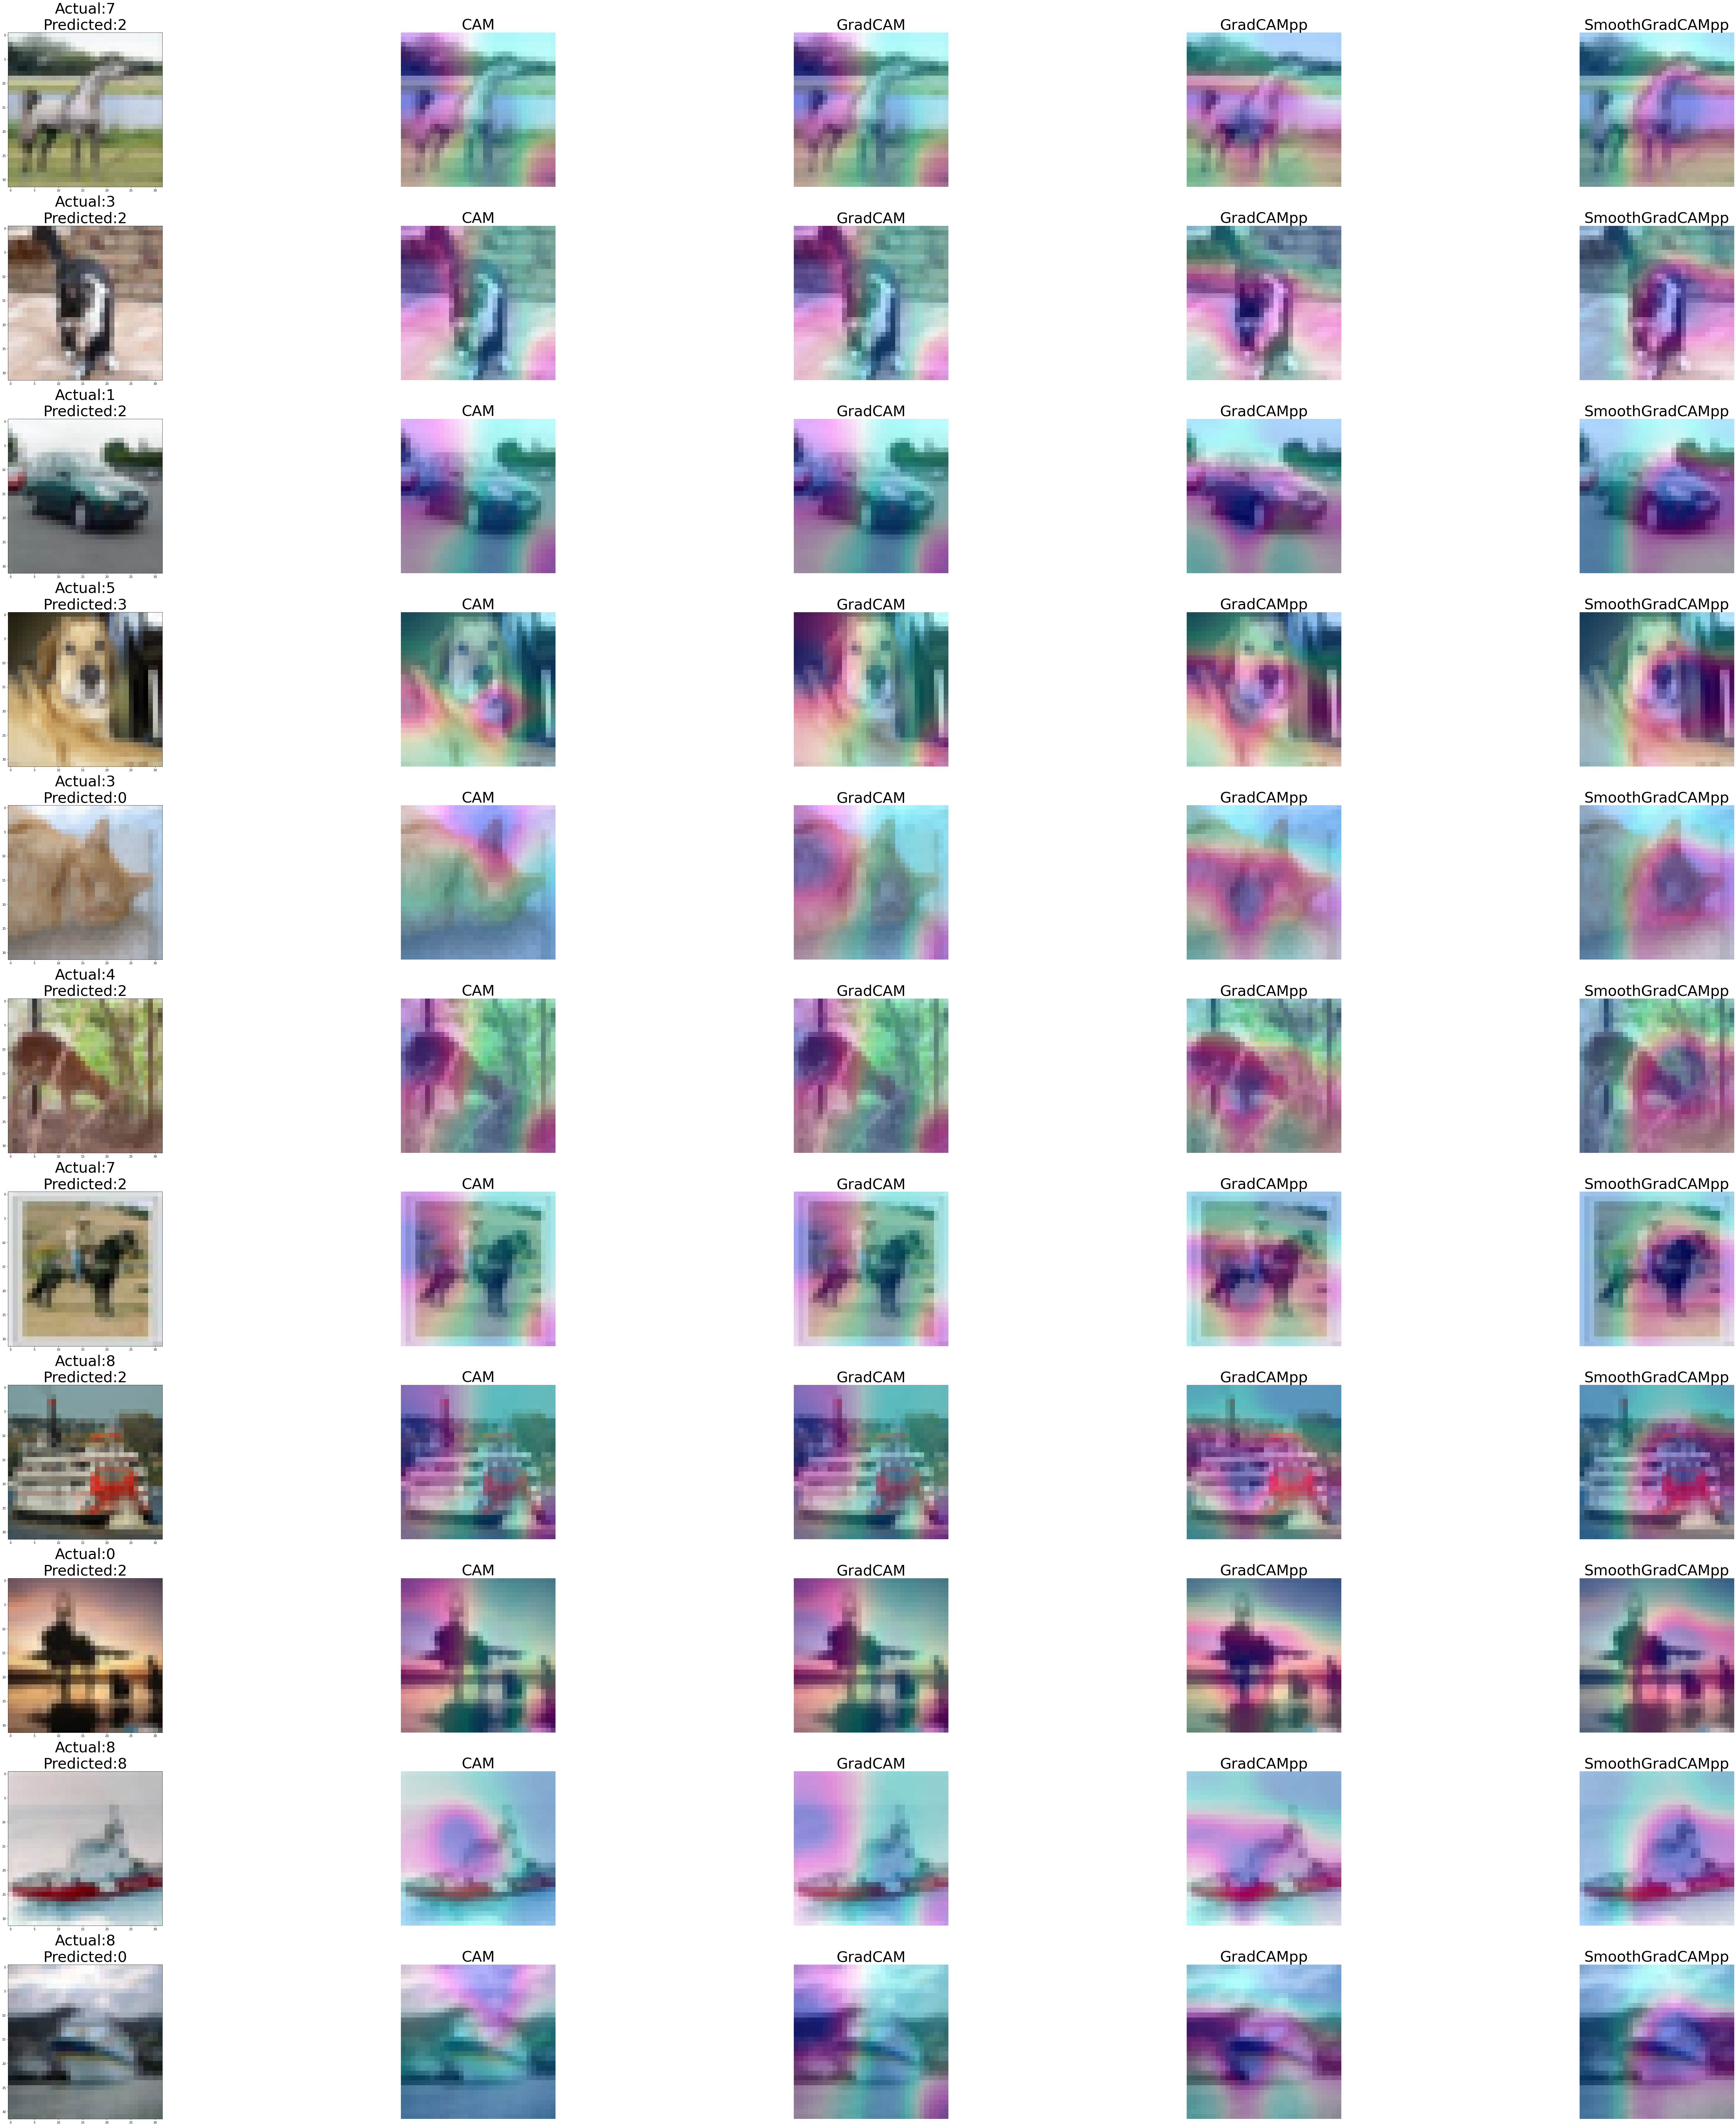

In [14]:
cam_extractor = load_cams(model,device,'ResNet18')
plot_cams(data,target,cam_extractor,model,std,mean)

In [13]:
torch.save(model, 'D:\Github\EVA-5\Saved Models\model1')

In [19]:
from DeNN.visualization import *
from PIL import Image
from matplotlib.pyplot import imshow

In [20]:
model.eval()

Base Model Function 

In [21]:
model

Base Model Function 

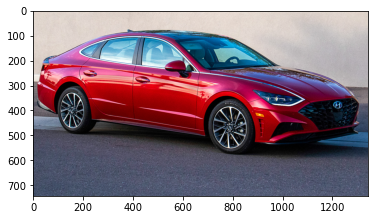

In [22]:
image = Image.open('D:/Github/PyDeNN/DeNN/Tutorial/CAMs Visualization/car.jpg')
# image = Image.open('./sample/dogsled.jpg')
imshow(image)

In [ ]:
normalize = transforms.Normalize(
   mean=[0.4914, 0.4822, 0.4465],
   std=[0.2023, 0.1994, 0.2010]
)

preprocess = transforms.Compose([
    transforms.ToTensor(),
    normalize
])